In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
df  = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


based on feature1 and feature2 we want to predict the price

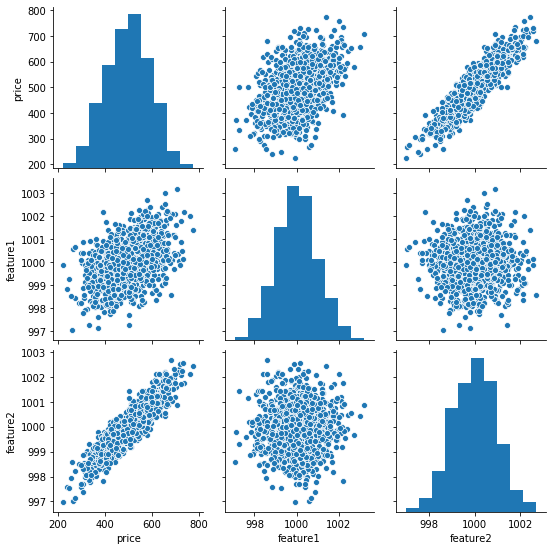

In [4]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['feature1', 'feature2']].values

In [0]:
y = df['price'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# help(MinMaxScaler)

In [0]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

we can only fit on the train data, using the test data would be cheating :)

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [18]:
model.fit(x=X_train,y=y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 703us/sample - loss: 256116.1007
Epoch 2/250
700/700 [==============================] - 0s 52us/sample - loss: 255919.1095
Epoch 3/250
700/700 [==============================] - 0s 52us/sample - loss: 255716.1034
Epoch 4/250
700/700 [==============================] - 0s 60us/sample - loss: 255491.0184
Epoch 5/250
700/700 [==============================] - 0s 64us/sample - loss: 255241.4854
Epoch 6/250
700/700 [==============================] - 0s 54us/sample - loss: 254964.2891
Epoch 7/250
700/700 [==============================] - 0s 59us/sample - loss: 254659.0277
Epoch 8/250
700/700 [==============================] - 0s 61us/sample - loss: 254322.5278
Epoch 9/250
700/700 [==============================] - 0s 62us/sample - loss: 253954.5255
Epoch 10/250
700/700 [==============================] - 0s 56us/sample - loss: 253547.8470
Epoch 11/250
700/700 [==============================] - 0s 60us/sample - loss

In [0]:
loss_df = pd.DataFrame(model.history.history)

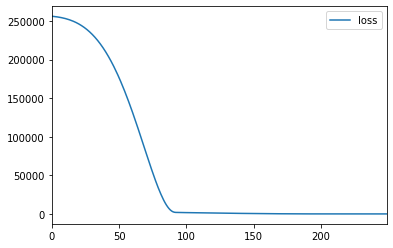

In [20]:
loss_df.plot()

In [38]:
model.evaluate(x=X_test,y=y_test, verbose=0)

26.56697016398112

In [0]:
predictions = model.predict(X_test)

In [0]:
pred_df = pd.DataFrame(y_test)
pred_df = pd.concat([pred_df, pd.DataFrame(predictions)], axis=1)
pred_df.columns = ['Y True', 'Predictions']

In [54]:
pred_df.head()

,Y True,Predictions
0,402.296319,406.235748
1,624.156198,624.928040
2,582.455066,593.448059
3,578.588606,573.530090
4,371.224104,367.521484


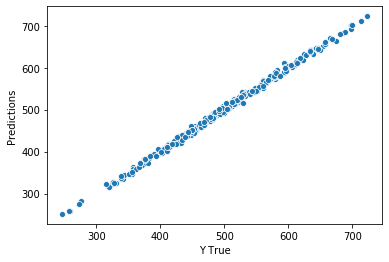

In [55]:
sns.scatterplot(x=pred_df['Y True'], y='Predictions', data=pred_df)

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
print(mean_absolute_error(pred_df['Y True'], pred_df['Predictions']))
print(mean_squared_error(pred_df['Y True'], pred_df['Predictions']))

4.178713364015009
26.566972147846755


In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('test_saved_model.h5')